<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

### Part 1 : EDA and data preprocessing

In [489]:
! pip install plotly
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import pandas as pd
import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [490]:
datawal=pd.read_csv("Walmart_Store_sales.csv") # reading of dataset
datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [491]:
# Basic statistics

print("------------------------")
print("Basics statistics: ")
data_desc = datawal.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

print("details of features : ")
datawal.info()
print("------------------------")


------------------------
Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64


details of features : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
------------------------


#### Definition CPI ("Consumer price index") : This index measures the change in prices for the essential goods and services 
#### that the least wealthy in our society must consume, such as rent, food and energy.

In [492]:
datawal = datawal[datawal['Weekly_Sales'].notna()] # Drop rows without "y" column (Weekly_sales)
datawal


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [493]:
datawal = datawal[datawal['Date'].notna() & datawal['Holiday_Flag'].notna()]  # Drop rows with Nan in Date column ad HolidayFlag 
datawal



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023623,6.961
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [494]:
datawal['Date'] = pd.to_datetime(datawal['Date'])  #Convert date in datetime object
datawal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         109 non-null    float64       
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  109 non-null    float64       
 3   Holiday_Flag  109 non-null    float64       
 4   Temperature   98 non-null     float64       
 5   Fuel_Price    98 non-null     float64       
 6   CPI           100 non-null    float64       
 7   Unemployment  98 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.7 KB


<ipython-input-494-9c470b8f33fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['Date'] = pd.to_datetime(datawal['Date'])  #Convert date in datetime object


In [495]:
datawal['year'] = datawal['Date'].dt.year    #create 4 columns for splitting date
datawal['month'] = datawal['Date'].dt.month
datawal['day'] = datawal['Date'].dt.day
datawal['weekday'] = datawal['Date'].dt.weekday
datawal

<ipython-input-495-6fe9d25220e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['year'] = datawal['Date'].dt.year    #create 4 columns for splitting date
<ipython-input-495-6fe9d25220e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawal['month'] = datawal['Date'].dt.month
<ipython-input-495-6fe9d25220e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,5
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,3


In [496]:
print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

Percentage of missing values: 


Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     10.091743
Fuel_Price      10.091743
CPI              8.256881
Unemployment    10.091743
year             0.000000
month            0.000000
day              0.000000
weekday          0.000000
dtype: float64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

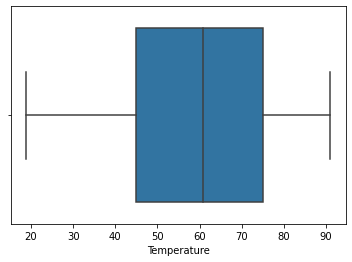

In [497]:
sns.boxplot(datawal['Temperature']) # detect outliers for Temperature, Fuel_price, CPI and Unemployment features

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price'>

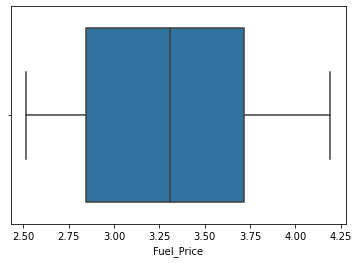

In [498]:
sns.boxplot(datawal['Fuel_Price'])


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPI'>

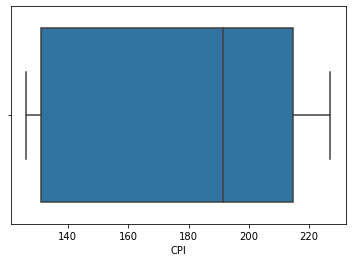

In [499]:
sns.boxplot(datawal['CPI'])


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

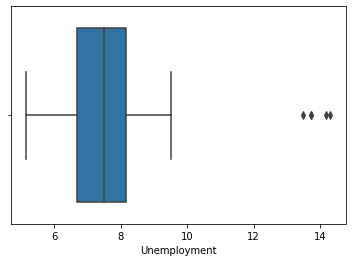

In [500]:
sns.boxplot(datawal['Unemployment'])

#### There are outliers for the feature "Unemployment". We will check and remove them herebelow

In [501]:
datawal['Unemployment'].mean()

7.719989795918366

In [502]:
datawal["Unemployment"].std()*3

5.171528481416763

In [503]:
upper_bound = datawal["Unemployment"].mean()+datawal["Unemployment"].std()*3
upper_bound

12.891518277335129

In [504]:
lower_bound = datawal["Unemployment"].mean()-datawal["Unemployment"].std()*3
lower_bound

2.548461314501603

In [505]:
mask = (datawal["Unemployment"] < upper_bound) & (datawal["Unemployment"] > lower_bound)
mask

1       True
4       True
5       True
6       True
7       True
       ...  
144     True
145     True
147    False
148    False
149     True
Name: Unemployment, Length: 109, dtype: bool

In [506]:
clean_datawal = datawal.loc[mask, :]  #cleaning of outliers
clean_datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012,3,2,4


In [507]:
# to remplace by "mean" the lacking values 
clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
clean_datawal['CPI'].fillna(value=clean_datawal['CPI'].mean(), inplace=True)
clean_datawal['Unemployment'].fillna(value=clean_datawal['Unemployment'].mean(), inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [508]:
print("Percentage of missing values: ")  #To control if ok about "fillna"
display(100*clean_datawal.isnull().sum()/clean_datawal.shape[0])
print()

Percentage of missing values: 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
dtype: float64

In [509]:
clean_datawal.shape

(93, 12)

In [510]:
cols = list(clean_datawal.columns.values)
cols

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'year',
 'month',
 'day',
 'weekday']

In [511]:
clean_datawal=clean_datawal[['Store',  #Reorganisation of columns before preprocessing and drop date,
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment','year',
 'month',
 'day',
 'weekday','Weekly_Sales']]
clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
1,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
4,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
5,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
6,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
7,20.0,0.0,39.930000,3.617,213.023623,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
142,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
143,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
144,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
145,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


In [512]:
#reinitialisate index
clean_datawal = clean_datawal.reset_index(drop=True)

#### It remains 93 rows / 150
#### now let's move on some visualizations to check possible coorelations

<AxesSubplot:>

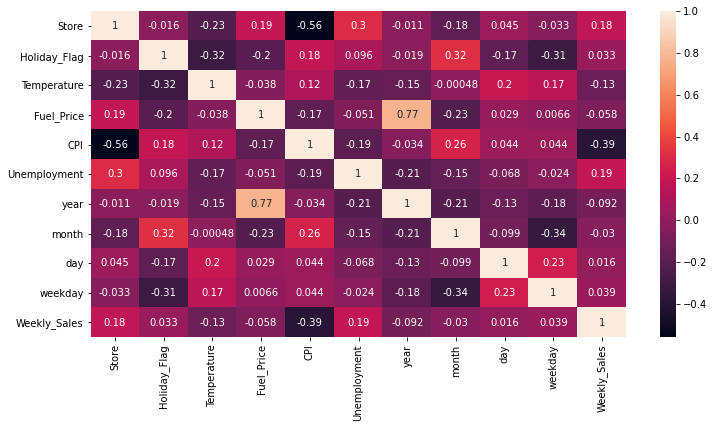

In [513]:
corr = clean_datawal.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

#### Negative coorelation for "CPI/Store" and "CPI/Weekly sales"
#### CPI/Store is not relevant because Store feature is an ID, we will check the couple "Unemployment/Weekly Sales"
#### Strong positive coorelation between "Fuel_Price/Year"(0,82)

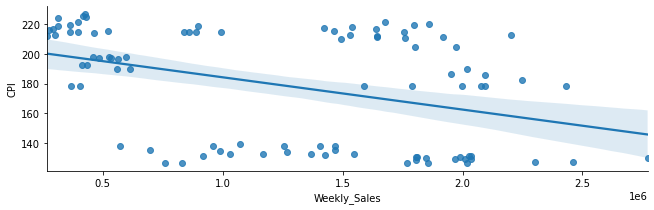

In [514]:
sns.lmplot(x="Weekly_Sales", y="CPI", data=clean_datawal, height=3,aspect=3)

#### When CPI decreases, the sales increases

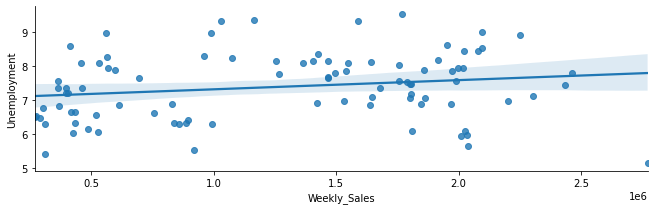

In [515]:
sns.lmplot(x="Weekly_Sales", y="Unemployment", data=clean_datawal, height=3,aspect=3)

#### Sales Increases when Unemployment increases too but slightly

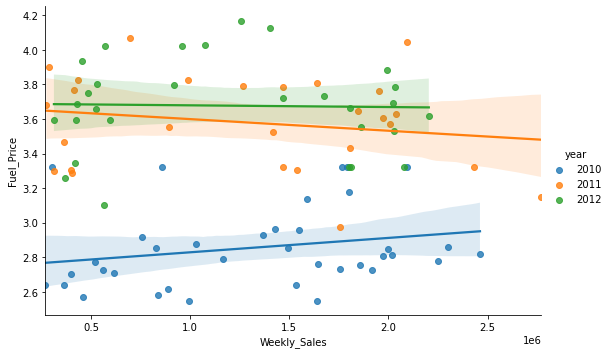

In [516]:
sns.lmplot(x="Weekly_Sales", y="Fuel_Price", data=clean_datawal,hue="year", height=5,aspect=1.5)

#### Per year, fuel price has not impact on sales

### Preprocessing

In [517]:
# separate X from Y features
target = "Weekly_Sales"
features = ['Store',  
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment','year',
 'month',
 'day',
 'weekday']

X = clean_datawal.loc[:,features]
Y = clean_datawal.loc[:,target]
#clean_datawal['Store'].unique()

In [518]:
X = X.values
Y = Y.tolist()

In [519]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)  #Split between train set and test set # error about not found in dataset value 9 for Store feature, changed random to 5
X_train[0:5,:]

array([[  14.        ,    0.        ,   58.96564706,    4.046     ,
         185.9374378 ,    8.521     , 2011.        ,    6.        ,
           5.        ,    6.        ],
       [  16.        ,    0.        ,   48.29      ,    3.75      ,
         197.4133259 ,    6.162     , 2012.        ,    3.        ,
          30.        ,    4.        ],
       [   5.        ,    0.        ,   77.38      ,    3.899     ,
         216.5343611 ,    6.489     , 2011.        ,    5.        ,
          13.        ,    4.        ],
       [   9.        ,    0.        ,   49.96      ,    2.771     ,
         215.4372854 ,    6.56      , 2010.        ,   11.        ,
          19.        ,    4.        ],
       [   3.        ,    0.        ,   82.7       ,    3.346     ,
         225.3068615 ,    6.664     , 2012.        ,    6.        ,
          22.        ,    4.        ]])

In [520]:
numeric_features = [2,3,4,5] #Create pipeline for numeric features

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))])  # resolution error found about message "Cannot center sparse matrices: pass `with_mean=False` in

In [521]:
categorical_features = [0,1] #Create pipeline for categorical features

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))])

In [522]:
preprocessor = ColumnTransformer(
    
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [523]:
# Preprocessing on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

Performing preprocessings on train set...
[[  14.            0.           58.96564706    4.046       185.9374378
     8.521      2011.            6.            5.            6.        ]
 [  16.            0.           48.29          3.75        197.4133259
     6.162      2012.            3.           30.            4.        ]
 [   5.            0.           77.38          3.899       216.5343611
     6.489      2011.            5.           13.            4.        ]
 [   9.            0.           49.96          2.771       215.4372854
     6.56       2010.           11.           19.            4.        ]
 [   3.            0.           82.7           3.346       225.3068615
     6.664      2012.            6.           22.            4.        ]]
...Done.
  (0, 0)	3.7394225492559983
  (0, 1)	8.711720187872
  (0, 2)	4.828733718006622
  (0, 3)	8.792680782992893
  (0, 15)	1.0
  (1, 0)	3.0624053819579156
  (1, 1)	8.074382279911022
  (1, 2)	5.126758733668858
  (1, 3)	6.358467196902031

In [524]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on test set...
[[8.00000000e+00 0.00000000e+00 7.49200000e+01 2.61900000e+00
  2.14936279e+02 6.31500000e+00 2.01000000e+03 8.00000000e+00
  2.70000000e+01 4.00000000e+00]
 [2.00000000e+00 0.00000000e+00 5.96900000e+01 2.72800000e+00
  2.11660898e+02 8.16300000e+00 2.01000000e+03 1.20000000e+01
  1.10000000e+01 5.00000000e+00]
 [1.50000000e+01 0.00000000e+00 4.74200000e+01 4.02100000e+00
  1.37584387e+02 7.94300000e+00 2.01200000e+03 3.00000000e+00
  1.60000000e+01 4.00000000e+00]
 [7.00000000e+00 0.00000000e+00 3.93000000e+01 3.93600000e+00
  1.97722738e+02 8.09000000e+00 2.01200000e+03 4.00000000e+00
  2.00000000e+01 4.00000000e+00]
 [2.00000000e+01 0.00000000e+00 6.93700000e+01 3.32240964e+00
  1.78360183e+02 7.52700000e+00 2.01000000e+03 9.00000000e+00
  2.40000000e+01 4.00000000e+00]]
...Done.
  (0, 0)	4.7511992382747374
  (0, 1)	5.639148584289858
  (0, 2)	5.581824033711616
  (0, 3)	6.516345398967271
  (0, 10)	1.0
  (1, 0)	3.7853588165058603
  (1, 1)	5.87

### Part 2 : Baseline model (linear regression)

In [525]:
# Train model

regressor = LinearRegression()
regressor.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

...Done.


In [526]:
regressor.score(X_train, Y_train)

0.97326775810938

In [527]:
regressor.predict(X_test)

array([ 937274.75390383, 2026204.87559482,  669910.75651703,
        519529.40909132, 2049789.81475542,  862496.27988407,
       1690055.83540828,  913533.02876377, 1454903.83954456,
        309799.43420428, 1880971.59237202, 2066010.38120547,
        906113.32015153,  555996.91384044, 2128827.04051716,
       1434051.75306336,  546417.32190433, 2094893.8375632 ,
        470677.85171229])

In [528]:
# Predictions on training set

Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

...Done.
[2049832.63303677  509918.51115982  226103.76423332  519823.29999067
  395261.60236768]



In [529]:
# Predictions on test set

Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

...Done.
[ 937274.75390383 2026204.87559482  669910.75651703  519529.40909132
 2049789.81475542]



In [530]:
# Print scores
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.97326775810938
R2 score on test set :  0.8617390762763474


In [532]:
regressor.coef_  #to analyze the values of the model's coefficients to know what features are important for the prediction

array([   -9344.27590124,   -43181.01341089,  -108240.10735087,
        -120843.91060955,   446933.10771336, -1261477.93528782,
         199095.84050376, -1428853.69551612,  -113870.7309368 ,
       -1007792.64380996,  -864339.14678162, -1250490.14771561,
         127556.55025208,   154230.75168937,    11950.98706608,
         565007.86048663, -1032073.46488699, -1270655.02265595,
       -1137709.78508213,  -594621.23171178,  -329533.31608428,
         358605.93625017,   -34693.61381368])

### Part 3 : Fight overfitting

In [534]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [548]:
# Perform 6-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("6-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=6)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

6-fold cross-validation...
The cross-validated R2-score is :  0.7087597141913666
The standard deviation is :  0.18484996722994076


In [556]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 6) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.8033964306296092


In [557]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[2040944.02858713  537035.20655881  266798.57641426  620038.17792145
  415312.57367272 2054999.23614775  552046.49301588 1065879.15290972
 1378284.70474254 1015877.46694327 2189203.20445833 2097257.62045295
  419143.35221087  453869.77736234 1539903.2953631   338781.66012266
  359777.35581096 1059587.68265275 1897107.04778216 1063123.2074825
  395614.97604635 2092123.26080347 2081957.23447889  760075.38758137
 2085308.39005521  418272.6069306   378492.86591504 1347469.5882169
  900769.24234575 1976399.52799294 2008899.33918562 1890115.08344814
  522667.9859456  1487541.70467443 1901481.21652599  978447.91141337
 2097439.58921017 1522014.25092244 1441495.76763987 1950372.50936392
 1995470.26173159 1960511.16127617 2303905.79827789 1985826.13381213
 1433292.8498456  1884237.04145028 2038016.56164101  843488.386603
  453615.51177438 1570199.09259215  302744.01792885 1605168.92519202
  907370.65068304  454878.44928205 1511220.32869501 1053507.4836059

In [558]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 931869.11485881 2050306.06462981  758541.21981489  542925.71015016
 1953889.00881505  934830.28336295 1840029.36380015 1046442.9303256
 1436851.14254252  340664.18054441 1910849.75407874 2075884.43313023
  954288.983885    615563.01188484 2130412.98666108 1426715.65737834
  569935.85963889 2100568.6862695   404274.95488236]



In [559]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9698297920100015
R2 score on test set :  0.8904609608555906
